Numerical Analysis -03 Assignment - FHP6QZ

In [68]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1-Runge’s phenomenon

Defining Lagrange's Interpolation Polynomial

In [69]:
def lagrange_poly(f, x_vector):
    
    p_n = np.poly1d([0])
    
    for x_k in x_vector:
        l_k = np.poly1d([1])
        for x_j in x_vector:
            if x_k == x_j:
                continue
                
            p = np.poly1d([1 / (x_k - x_j), -x_j / (x_k - x_j)])
            l_k *= p
        
        y = f(x_k)
        p_n += l_k * y

    return p_n

Defining Inf. norm

In [70]:
def inf_norm(f, p_n, x_vector):
    return max(abs(f(x_vector)) - abs(p_n(x_vector)))

Defining the Function F(x) = 1/(1+x^2)

In [71]:
def f_x(x):
    return 1 / (1 + np.power(x, 2))

1(a)

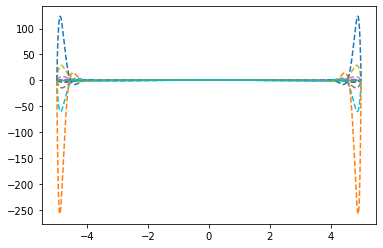

In [72]:
a = -5
b = 5

inf_norm_vector = list()
x = np.linspace(a, b, 1000) #1000

for n in range(2, 25, 2):
    x_vector = np.linspace(a, b, n + 1)
    p_n = lagrange_poly(f_x, x_vector)
    inf_norm_vector.append(inf_norm(f_x, p_n, x_vector))
    plt.plot(x, p_n(x),linestyle='dashed')
    
plt.plot(x, f_x(x),'c')
plt.show()


Chebyshev polynomial

In [73]:
def chebysev_poly_int_points(a, b, n):
    cip = list()
    
    for j in range(1, n + 2):
        t = np.cos(((2*j - 1)*np.pi/(2*n + 2)))
        cip.append(0.5*(b - a)*t + 0.5*(b + a))
        
    return cip

1(b)

[0.0, 2.498001805406602e-16, 0.0, 7.385758671318854e-14, 1.1102230246251565e-16, 3.525194025577605e-12, 3.2029934260435766e-14, 3.6814275933272356e-10, 6.617117270790729e-11, 1.765402338205213e-10, 3.6637359812630166e-15, 3.1484344213544846e-06]


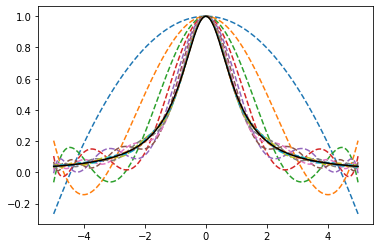

In [74]:
a = -5
b = 5

inf_norm_vector = list()
x = np.linspace(a, b, 1000)

for n in range(2, 25, 2):
    x_vector = chebysev_poly_int_points(a, b, n)
    p_n = lagrange_poly(f_x, x_vector)
    inf_norm_vector.append(inf_norm(f_x, p_n, x_vector))
    plt.plot(x, p_n(x),linestyle='dashed')
    
print(inf_norm_vector)
plt.plot(x, f_x(x), 'k')
plt.show()

#Observations:
#Polynomial interpolation at equispaced points reduces error in the middle of the range but not at the edges for Runge’s function.
#Fitting a polynomial using Chebyshev nodes as control points dramatically improves interpolation.

### Exercise 2

In [75]:
%matplotlib notebook
%matplotlib inline

from bisect import bisect
from matplotlib.animation import FuncAnimation

In [76]:
def f_x_t(x, t):
    return np.sin(5*np.pi*x)*np.cos(10*np.pi*t) + 2 * np.sin(7*np.pi*x)*np.cos(14*np.pi*t)

In [77]:
def f_prime(x, t):
    return 5*np.pi*np.cos(5*np.pi*x)*np.cos(10*np.pi*t) + 14*np.pi*np.cos(7*np.pi*x)*np.cos(14*np.pi*t)

Defining Linear Spline

In [78]:
def linear_spline(f, x_vect, x, t):
    assert (x >= x_vect[0]).any() and (x <= x_vect[-1]).any(), x
    
    if x == x_vect[-1]:
        right_index = len(x_vect) - 1
    else:
        right_index = bisect(x_vect, x)
    
    assert right_index > 0, (x, right_index)

    x_i = x_vect[right_index]
    x_i_1 = x_vect[right_index - 1]
    
    return ((x_i - x) / (x_i - x_i_1)) * f(x_i_1, t) + ((x - x_i_1) / (x_i - x_i_1)) * f(x_i, t)

Defining Natural cubic Spline

In [79]:
def nat_cub_spline(f, x_vect, x, t):
    assert (x >= x_vect[0]).any() and (x <= x_vect[-1]).any(), x
    
    sigma_vect = get_sigma(f, x_vect, t)
    
    if x == x_vect[-1]:
        right_index = len(x_vect) - 1
    else:
        right_index = bisect(x_vect, x)
    
    assert right_index > 0, (x, right_index)

    x_i = x_vect[right_index]
    x_i_1 = x_vect[right_index - 1]
    h_i = x_i - x_i_1
    
    sigma_i = sigma_vect[right_index]
    sigma_i_1 = sigma_vect[right_index - 1]
    
    alpha = f(x_i, t) / h_i - sigma_i * h_i / 6
    beta = f(x_i_1, t) / h_i - sigma_i_1 * h_i / 6
    
    return (x_i - x)**3 * sigma_i_1 / (6 * h_i) + \
            (x - x_i_1)**3 * sigma_i / (6 * h_i) + \
            alpha * (x - x_i_1) + beta * (x_i - x)

In [80]:
def get_sigma(f, x_vect, t):
    a = np.array([x_vect[i] - x_vect[i-1] for i in range(1, len(x_vect) - 1)])
    assert len(a) == len(x_vect) - 2, len(a)
    
    b = np.array([2 * (x_vect[i+1] - x_vect[i-1]) for i in range(1, len(x_vect) - 1)])
    assert len(b) == len(x_vect) - 2, len(b)
    
    c = np.array([x_vect[i+1] - x_vect[i] for i in range(1, len(x_vect) - 1)])
    assert len(c) == len(x_vect) - 2, len(c)
    
    r = np.array([6 * ((f(x_vect[i+1], t) - f(x_vect[i], t) / (x_vect[i+1] - x_vect[i])) 
                         - (f(x_vect[i], t) - f(x_vect[i-1], t) / (x_vect[i] - x_vect[i-1])))
                         for i in range(1, len(x_vect) - 1)])
    assert len(r) == len(x_vect) - 2, len(r)
    
    l = [0]
    u = [b[0]]
    y = [r[0]]
    
    for i in range(1, len(x_vect) - 2):
        l.append(a[i] / u[i-1])
        u.append(b[i] - l[i] * c[i-1])
        y.append(r[i] - l[i] * y[i-1])
        
    x = np.zeros(len(x_vect))
    x[-2] = y[-1] / u[-1]
    
    for i in range(len(x_vect) - 3, 0, -1):
        assert x[i] == 0
        x[i] = (y[i] - c[i] * x[i+1]) / u[i]
        
    return x

Defining Hermite cubic Spline

In [81]:
def herm_cub_spline(f, f_p, x_vect, x, t):
    assert (x >= x_vect[0]).any() and (x <= x_vect[-1]).any(), x
    
    if x == x_vect[-1]:
        right_index = len(x_vect) - 1
    else:
        right_index = bisect(x_vect, x)
    
    assert right_index > 0, (x, right_index)

    x_i = x_vect[right_index]
    x_i_1 = x_vect[right_index - 1]
    h_i = x_i - x_i_1
    
    def H_0(_x):
        return ((_x - x_i)**2 / h_i**2) * (1 + 2 * (_x - x_i_1) / h_i)
    
    def K_0(_x):
        return ((_x - x_i)**2 / h_i**2) * (_x - x_i_1)
    
    def H_1(_x):
        return ((_x - x_i_1)**2 / h_i**2) * (1 - 2 * (_x - x_i) / h_i)
    
    def K_1(_x):
        return ((_x - x_i_1)**2 / h_i**2) * (_x - x_i)
    
    return H_0(x) * f(x_i_1, t) + f_p(x_i_1, t) * K_0(x) + f(x_i, t) * H_1(x) + f_p(x_i, t) * K_1(x)

Linear Spline

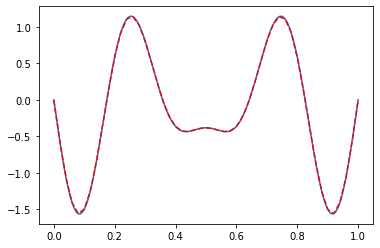

In [114]:
x_vect = [i / 50 for i in range(51)]
x_plot = np.linspace(0, 1, 1000)
t = 0.1

s_l = [linear_spline(f_x_t, x_vect, x, t) for x in x_plot]

plt.plot(x_plot, f_x_t(x_plot, t))
plt.plot(x_plot, s_l,'r',linestyle='--')
plt.show()

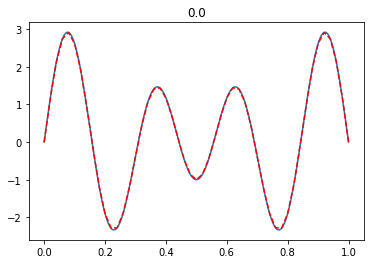

In [106]:
x_vect = [i / 50 for i in range(51)]
t_vect = [i / 50 for i in range(51)]
x_plot = np.linspace(0, 1, 1000)

fig, ax = plt.subplots()

def animate(frame_num):
    t = t_vect[frame_num]
    s_l = [linear_spline(f_x_t, x_vect, x, t) for x in x_plot]
    plt.gca().cla() 
    ax.plot(x_plot, f_x_t(x_plot, t))
    ax.plot(x_plot, s_l,'r',linestyle='dashed')
    ax.set_title(str(t))

anim = FuncAnimation(fig, animate, frames=len(t_vect), interval=200)
plt.show()


Natural cubic spline

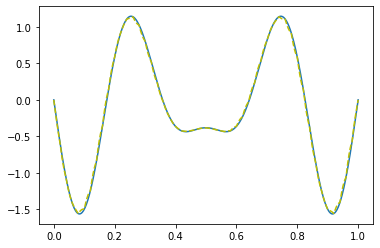

In [115]:
x_vect = [i / 50 for i in range(51)]
x_plot = np.linspace(0, 1, 1000)
t = 0.1

nc_l = [nat_cub_spline(f_x_t, x_vect, x, t) for x in x_plot]

plt.plot(x_plot, f_x_t(x_plot, t))
plt.plot(x_plot, nc_l,'y',linestyle='dashed')
plt.show()

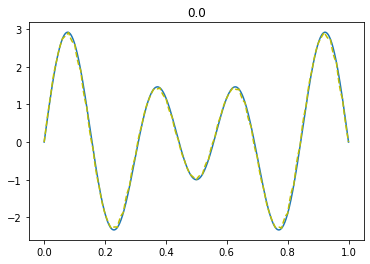

In [116]:
x_vect = [i / 50 for i in range(51)]
t_vect = [i / 50 for i in range(51)]
x_plot = np.linspace(0, 1, 1000)

fig, ax = plt.subplots()

def animate(frame_num):
    t = t_vect[frame_num]
    nc_l = [nat_cub_spline(f_x_t, x_vect, x, t) for x in x_plot]
    plt.gca().cla() 
    ax.plot(x_plot, f_x_t(x_plot, t))
    ax.plot(x_plot, nc_l,'y',linestyle='dashed')
    ax.set_title(str(t))

anim = FuncAnimation(fig, animate, frames=len(t_vect), interval=200)
plt.show()

Hermite Cubic Spline

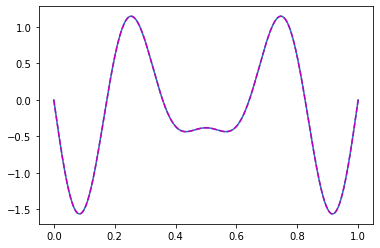

In [127]:
x_vect = [i / 50 for i in range(51)]
x_plot = np.linspace(0, 1, 1000)
t = 0.1

hc_l = [herm_cub_spline(f_x_t, f_prime, x_vect, x, t) for x in x_plot]

plt.plot(x_plot, f_x_t(x_plot, t))
plt.plot(x_plot, hc_l,'m',linestyle='--')
plt.show()

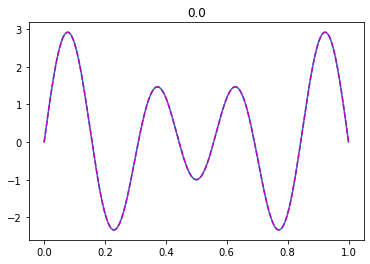

In [128]:
x_vect = [i / 50 for i in range(51)]
t_vect = [i / 50 for i in range(51)]
x_plot = np.linspace(0, 1, 1000)

fig, ax = plt.subplots()

def animate(frame_num):
    t = t_vect[frame_num]
    hc_l = [herm_cub_spline(f_x_t, f_prime, x_vect, x, t) for x in x_plot]
    plt.gca().cla() 
    ax.plot(x_plot, f_x_t(x_plot, t))
    ax.plot(x_plot, hc_l,'m',linestyle='--')
    ax.set_title(str(t))

anim = FuncAnimation(fig, animate, frames=len(t_vect), interval=200)
plt.show()

Mutual Animation

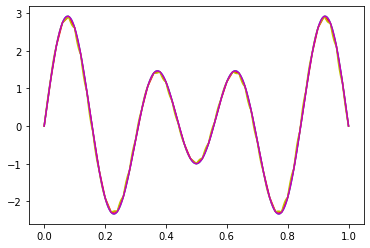

In [129]:
x_vect = [i / 50 for i in range(51)]
t_vect = [i / 50 for i in range(51)]
x_plot = np.linspace(0, 1, 1000)

fig, ax = plt.subplots()

def animate(frame_num):
    t = t_vect[frame_num]
    
    s_l = [linear_spline(f_x_t, x_vect, x, t) for x in x_plot]
    nc_l = [nat_cub_spline(f_x_t, x_vect, x, t) for x in x_plot]
    hc_l = [herm_cub_spline(f_x_t, f_prime, x_vect, x, t) for x in x_plot]
    
    plt.gca().cla() 
    ax.plot(x_plot, f_x_t(x_plot, t),'c')
    ax.plot(x_plot, s_l,'r')
    ax.plot(x_plot, nc_l,'y')
    ax.plot(x_plot, hc_l,'m',)
    #ax.set_title(str(t))

anim = FuncAnimation(fig, animate, frames=len(t_vect), interval=200)
plt.show()